In [38]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity


In [39]:
file_path = r"Lab Session Data.xlsx"
xls = pd.ExcelFile(file_path)


In [50]:
# A1: Matrix Segregation and Analysis
def analyze_purchase_data():
    try:
        df = pd.read_excel(xls, sheet_name="Purchase data")
        purchase_matrix = df.iloc[:, 1:4].values
        purchase_amounts = df.iloc[:, 4].values.reshape(-1, 1)
        dimensionality = purchase_matrix.shape[1]
        num_vectors = purchase_matrix.shape[0]
        rank_A = np.linalg.matrix_rank(purchase_matrix)
        purchase_matrix_pinv = np.linalg.pinv(purchase_matrix)
        product_costs = np.dot(purchase_matrix_pinv, purchase_amounts).flatten()
        print("A1 Results:")
        print(f"Dimensionality: {dimensionality}")
        print(f"Number of Vectors: {num_vectors}")
        print(f"Rank of A: {rank_A}")
        print(f"Product Costs: {product_costs}")
        return dimensionality, num_vectors, rank_A, product_costs
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None, None, None, None
    except ValueError:
        print("Error: Could not read specified sheet from Excel file.")
        return None, None, None, None

analyze_purchase_data()

A1 Results:
Dimensionality: 3
Number of Vectors: 10
Rank of A: 3
Product Costs: [ 1. 55. 18.]


(3, 10, 3, array([ 1., 55., 18.]))

In [51]:
# A2: Compute Model Vector X
def compute_model_vector():
    _, _, _, product_costs = analyze_purchase_data()
    if product_costs is not None:
        print("A2 Result:")
        print(f"Model Vector X (Product Costs): {product_costs}")
        return product_costs
    else:
        return None

compute_model_vector

<function __main__.compute_model_vector()>

In [52]:
# A3: Customer Classification
def classify_customers():
    try:
        df = pd.read_excel(xls, sheet_name="Purchase data")
        df["Customer Class"] = np.where(df.iloc[:, 4] > 200, "RICH", "POOR")
        print("A3 Result:")
        print(df[["Customer Class"]])
        return df[["Customer Class"]]
    except ValueError:
        print("Error: Could not read 'Purchase data' from Excel.")
        return None

classify_customers()

A3 Result:
  Customer Class
0           RICH
1           RICH
2           RICH
3           POOR
4           RICH
5           POOR
6           RICH
7           RICH
8           POOR
9           POOR


,Customer Class
0,RICH
1,RICH
2,RICH
3,POOR
4,RICH
5,POOR
6,RICH
7,RICH
8,POOR
9,POOR


A4 Results:
Mean Price: 1560.663453815261
Variance Price: 58732.365352539186
Wednesday Mean Price: 1550.7060000000001
April Mean Price: 1698.9526315789474
Probability of Loss: 0.4979919678714859
Probability of Profit on Wednesday: 0.42


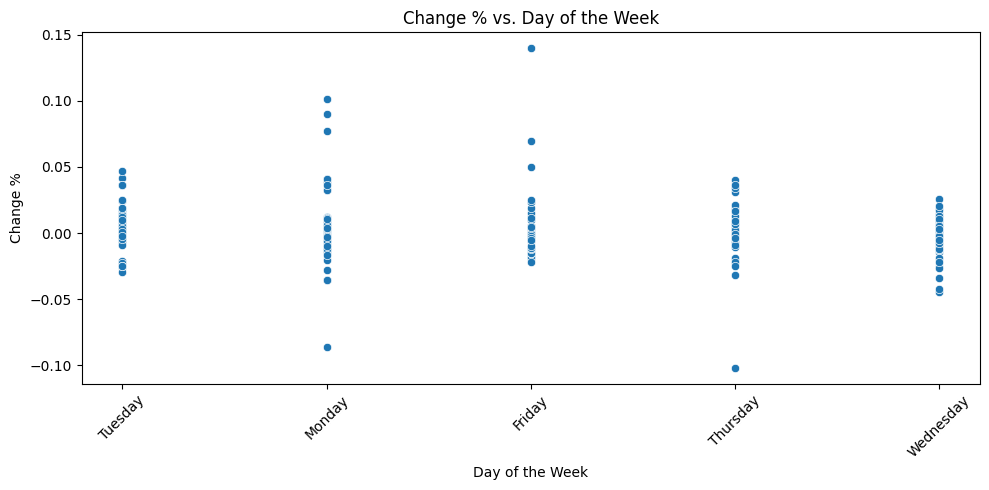

(1560.663453815261,
 58732.365352539186,
 1550.7060000000001,
 1698.9526315789474,
 0.4979919678714859,
 0.42)

In [53]:
# A4: IRCTC Stock Analysis
def analyze_irctc_stock():
    try:
        df = pd.read_excel(xls, sheet_name="IRCTC Stock Price")
        df["Date"] = pd.to_datetime(df["Date"])
        df["Day"] = df["Date"].dt.day_name()
        mean_price = statistics.mean(df["Price"])
        variance_price = statistics.variance(df["Price"])
        wednesday_mean = df[df["Day"] == "Wednesday"]["Price"].mean()
        april_mean = df[df["Date"].dt.month == 4]["Price"].mean()
        prob_loss = (df["Chg%"] < 0).mean()
        prob_profit_wed = df[(df["Day"] == "Wednesday") & (df["Chg%"] > 0)]["Chg%"].count() / df[df["Day"] == "Wednesday"]["Chg%"].count()
        print("A4 Results:")
        print(f"Mean Price: {mean_price}")
        print(f"Variance Price: {variance_price}")
        print(f"Wednesday Mean Price: {wednesday_mean}")
        print(f"April Mean Price: {april_mean}")
        print(f"Probability of Loss: {prob_loss}")
        print(f"Probability of Profit on Wednesday: {prob_profit_wed}")
        plt.figure(figsize=(10, 5))
        sns.scatterplot(x=df["Day"], y=df["Chg%"])
        plt.xlabel("Day of the Week")
        plt.ylabel("Change %")
        plt.xticks(rotation=45)
        plt.title("Change % vs. Day of the Week")
        plt.tight_layout()
        plt.show()
        return mean_price, variance_price, wednesday_mean, april_mean, prob_loss, prob_profit_wed
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None, None, None, None, None, None
    except KeyError:
        print("Error: One or more required columns ('Price', 'Chg%', 'Date') are missing from the Excel sheet.")
        return None, None, None, None, None, None
    except ValueError:
        print("Error: Could not read 'IRCTC Stock Price' from Excel.")
        return None, None, None, None, None, None

analyze_irctc_stock()

In [55]:
# A5: Data Exploration
def explore_thyroid_data():
    try:
        df = pd.read_excel(xls, sheet_name="thyroid0387_UCI")
        df.replace('?', np.nan, inplace=True)
        df = df.infer_objects()
        missing_values = df.isnull().sum()
        categorical_cols = df.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            df[col] = df[col].astype(str)
            df[col] = LabelEncoder().fit_transform(df[col])
        print("A5 Results:")
        print(df.describe())
        print("Missing Values:\n", missing_values)
        return df.describe(), missing_values
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None, None
    except ValueError:
        print("Error: Could not read specified sheet from Excel file.")
        return None, None

explore_thyroid_data()

C:\Users\palar\AppData\Local\Temp\ipykernel_15536\1879876335.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


A5 Results:
          Record ID           age          sex  on thyroxine  \
count  9.172000e+03   9172.000000  9172.000000   9172.000000   
mean   8.529473e+08     73.555822     0.371348      0.135194   
std    7.581969e+06   1183.976718     0.548110      0.341949   
min    8.408010e+08      1.000000     0.000000      0.000000   
25%    8.504090e+08     37.000000     0.000000      0.000000   
50%    8.510040e+08     55.000000     0.000000      0.000000   
75%    8.607110e+08     68.000000     1.000000      0.000000   
max    8.701190e+08  65526.000000     2.000000      1.000000   

       query on thyroxine  on antithyroid medication         sick  \
count         9172.000000                9172.000000  9172.000000   
mean             0.016681                   0.012647     0.037505   
std              0.128081                   0.111752     0.190007   
min              0.000000                   0.000000     0.000000   
25%              0.000000                   0.000000     0.000000 

(          Record ID           age          sex  on thyroxine  \
 count  9.172000e+03   9172.000000  9172.000000   9172.000000   
 mean   8.529473e+08     73.555822     0.371348      0.135194   
 std    7.581969e+06   1183.976718     0.548110      0.341949   
 min    8.408010e+08      1.000000     0.000000      0.000000   
 25%    8.504090e+08     37.000000     0.000000      0.000000   
 50%    8.510040e+08     55.000000     0.000000      0.000000   
 75%    8.607110e+08     68.000000     1.000000      0.000000   
 max    8.701190e+08  65526.000000     2.000000      1.000000   
 
        query on thyroxine  on antithyroid medication         sick  \
 count         9172.000000                9172.000000  9172.000000   
 mean             0.016681                   0.012647     0.037505   
 std              0.128081                   0.111752     0.190007   
 min              0.000000                   0.000000     0.000000   
 25%              0.000000                   0.000000     0.000

In [54]:
# A6: Data Imputation
def impute_missing_data():
    try:
        df = pd.read_excel(xls, sheet_name="thyroid0387_UCI")
        df.replace('?', np.nan, inplace=True)
        df = df.infer_objects()
        for col in df.columns:
            if df[col].dtype in ['float64', 'int64']:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
        print("A6 Results:")
        print(df)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except ValueError:
        print("Error: Could not read specified sheet from Excel file.")
        return None

impute_missing_data()

A6 Results:
      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f

C:\Users\palar\AppData\Local\Temp\ipykernel_15536\1375671586.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,36.0,other,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,870119022,56,M,f,f,f,f,f,f,f,...,t,64.0,t,0.83,t,77.0,f,26.0,SVI,NO CONDITION
9168,870119023,22,M,f,f,f,f,f,f,f,...,t,91.0,t,0.92,t,99.0,f,26.0,SVI,NO CONDITION
9169,870119025,69,M,f,f,f,f,f,f,f,...,t,113.0,t,1.27,t,89.0,f,26.0,SVI,I
9170,870119027,47,F,f,f,f,f,f,f,f,...,t,75.0,t,0.85,t,88.0,f,26.0,other,NO CONDITION


In [56]:
# A7: Data Normalization
def normalize_data():
    df = impute_missing_data()
    if df is None:
        return None
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    scaler = MinMaxScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    print("A7 Results:")
    print(df)
    return df

normalize_data()


A6 Results:
      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f

C:\Users\palar\AppData\Local\Temp\ipykernel_15536\1375671586.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0.000000e+00,0.000427,0,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,0,0.129565,5,25
1,3.410871e-08,0.000427,0,0,0,0,0,0,0,0,...,1,0.210702,0,0.365741,0,0.122328,0,0.129565,5,25
2,9.891527e-07,0.000610,0,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.054527,5,25
3,6.934301e-05,0.000534,0,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.129565,5,25
4,6.937712e-05,0.000473,0,0,0,0,0,0,0,0,...,0,0.170569,0,0.365741,0,0.122328,1,0.179590,5,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,9.999996e-01,0.000839,1,0,0,0,0,0,0,0,...,1,0.103679,1,0.305556,1,0.085948,0,0.129565,3,25
9168,9.999996e-01,0.000320,1,0,0,0,0,0,0,0,...,1,0.148829,1,0.347222,1,0.110960,0,0.129565,3,25
9169,9.999997e-01,0.001038,1,0,0,0,0,0,0,0,...,1,0.185619,1,0.509259,1,0.099591,0,0.129565,3,15
9170,9.999997e-01,0.000702,0,0,0,0,0,0,0,0,...,1,0.122074,1,0.314815,1,0.098454,0,0.129565,5,25


In [57]:
# A8: Jaccard and SMC Similarity
def calculate_jaccard_smc():
    df = normalize_data()
    if df is None:
        return None, None
    vector1 = df.iloc[0, :].values
    vector2 = df.iloc[1, :].values
    f11 = np.sum((vector1 == 1) & (vector2 == 1))
    f00 = np.sum((vector1 == 0) & (vector2 == 0))
    f10 = np.sum((vector1 == 1) & (vector2 == 0))
    f01 = np.sum((vector1 == 0) & (vector2 == 1))
    denominator = (f01 + f10 + f11)
    JC = f11 / denominator if denominator != 0 else 0
    SMC = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0
    print("A8 Results:")
    print(f"Jaccard Coefficient: {JC}, SMC: {SMC}")
    return JC, SMC

calculate_jaccard_smc()

A6 Results:
      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f

C:\Users\palar\AppData\Local\Temp\ipykernel_15536\1375671586.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


(0.25, 0.8571428571428571)

In [58]:
# A9: Cosine Similarity
def calculate_cosine_similarity():
    df = normalize_data()
    if df is None:
        return None
    vector1 = df.iloc[0, :].values.reshape(1, -1)
    vector2 = df.iloc[1, :].values.reshape(1, -1)
    result = cosine_similarity(vector1, vector2)[0][0]
    print("A9 Result:", result)
    return result

calculate_cosine_similarity()   

A6 Results:
      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f

C:\Users\palar\AppData\Local\Temp\ipykernel_15536\1375671586.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


0.9977009625064738

C:\Users\palar\AppData\Local\Temp\ipykernel_15536\1375671586.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


A6 Results:
      Record ID  age sex on thyroxine query on thyroxine  \
0     840801013   29   F            f                  f   
1     840801014   29   F            f                  f   
2     840801042   41   F            f                  f   
3     840803046   36   F            f                  f   
4     840803047   32   F            f                  f   
...         ...  ...  ..          ...                ...   
9167  870119022   56   M            f                  f   
9168  870119023   22   M            f                  f   
9169  870119025   69   M            f                  f   
9170  870119027   47   F            f                  f   
9171  870119035   31   M            f                  f   

     on antithyroid medication sick pregnant thyroid surgery I131 treatment  \
0                            f    f        f               f              f   
1                            f    f        f               f              f   
2                            f

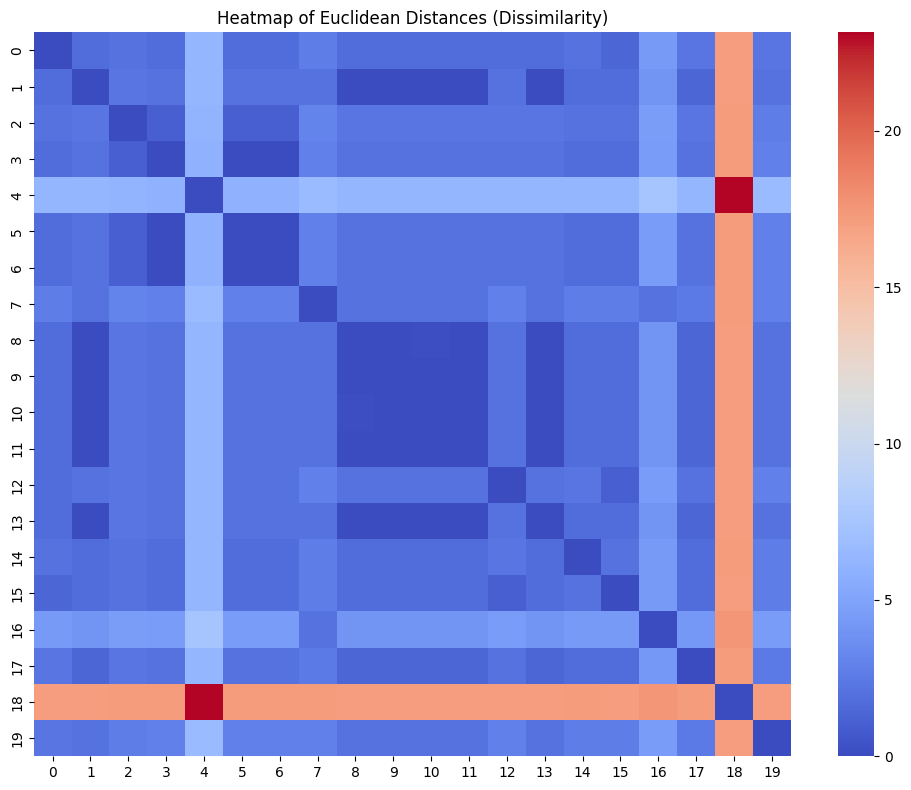

A10 Result: (Euclidean Distance Matrix - Not Printed for brevity)


array([[0.00000000e+00, 1.73251746e+00, 2.00140825e+00, 1.73205206e+00,
        6.24519870e+00, 1.73205212e+00, 1.73223280e+00, 2.64611490e+00,
        1.73269338e+00, 1.73244524e+00, 1.73287556e+00, 1.73206114e+00,
        1.73205093e+00, 1.73239125e+00, 2.00077689e+00, 1.41422030e+00,
        4.35900667e+00, 2.23618680e+00, 1.71764614e+01, 2.23701077e+00],
       [1.73251746e+00, 0.00000000e+00, 2.23768665e+00, 2.00040268e+00,
        6.32488050e+00, 2.00040273e+00, 2.00055918e+00, 2.00048154e+00,
        8.71383994e-02, 7.60737305e-02, 2.38128558e-02, 3.88820660e-02,
        2.00040379e+00, 3.43766641e-02, 1.73341129e+00, 1.73251682e+00,
        4.00001667e+00, 1.41439996e+00, 1.71475751e+01, 2.00192457e+00],
       [2.00140825e+00, 2.23768665e+00, 0.00000000e+00, 1.00281137e+00,
        6.08404805e+00, 1.00281141e+00, 1.00125062e+00, 3.00125906e+00,
        2.23782356e+00, 2.23763021e+00, 2.23796336e+00, 2.23733440e+00,
        2.23732736e+00, 2.23759048e+00, 2.00218243e+00, 2.0014

In [59]:
# A10: Heatmap Plot for Similarity Measures
def plot_similarity_heatmap():
    df = normalize_data()
    if df is None:
        return None
    df_subset = df.iloc[:20, :]
    similarity_matrix = np.zeros((20, 20))
    for i in range(20):
        for j in range(20):
            if i != j:
                similarity_matrix[i, j] = np.linalg.norm(df_subset.iloc[i] - df_subset.iloc[j])
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=False, cmap='coolwarm')
    plt.title("Heatmap of Euclidean Distances (Dissimilarity)")
    plt.tight_layout()
    plt.show()
    print("A10 Result: (Euclidean Distance Matrix - Not Printed for brevity)")
    return similarity_matrix

plot_similarity_heatmap()